In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import math as m

In [9]:
# this is a function used for plotting gaussian distributions
def gaussian(input_vector_x,mean,variance):
    return np.exp(-(1/(2*variance))*(input_vector_x-mean)**2)*(2*m.pi*variance)**(-1/2)

## Probability of a Girl Birth Given Placenta Previa (37-38)

Here I replicate the last figure in figure 2.3, the posterior density for the sex ratio using simulation:

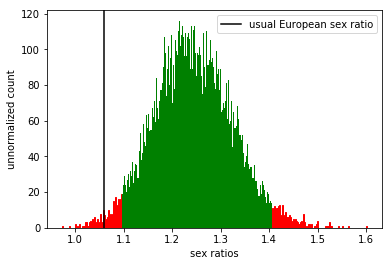

In [67]:
theta = np.random.beta(437+1,980-437+1,size=10000) # uniform prior b/c of principle of insufficient reason
sex_ratio = (1-theta)/theta # male to female sex ratio
n,bins,patches = plt.hist(sex_ratio,bins=300,density=False,color='g');
plt.ylabel('unnormalized count');
plt.xlabel('sex ratios');
plt.axvline(1.06,label='usual European sex ratio',color='k');
plt.legend();
plt.setp([p for p,b in zip(patches,bins) if b>=np.sort(sex_ratio)[int(np.ceil(0.975*10000+1))]],color='r'); # 97.5 percentile as red
plt.setp([p for p,b in zip(patches,bins) if b<=np.sort(sex_ratio)[int(np.ceil(0.025*10000+1))]],color='r'); # 2.5 percentile as red

The green portion indicates a 95% posterior interval. Since the usual sex ratio falls in the critical region, we have two possible conclusions. The first option is that the data recorded for the usual European sex ratio was an unlikely occurence and it doesn't reflect the true sex ratio. The second option is that the usual European sex ratio is low for a reason -- because for placenta previa births, the proportion of male births are naturally higher than that of female births. Occam's Razor tells us to choose the option that sounds more likely which is the latter.

## Estimating Normal Mean with Known Variance (p. 39-42)

Here I graph the predictive posterior 95% central interval (given previous data points) for a standard normal random sample (graphed in a "time series" form). I also graph the posterior distribution for $\mu$ to visually see how confident the model is. In addition to the information presented in the specified page range, I have incorporated some additional math. Note that given past data points $y$ (this is a vector; using Gelman's notation), the predictive posterior density for a future data point $\tilde{y}$ (not a vector) is:

$$p(\tilde{y}|y) = \int p(\tilde{y}|\theta)p(\theta|y)\text{d}\theta \propto \int \exp\left(-\frac{1}{2\sigma^2}(\tilde{y}-\theta)^2\right)\exp\left(-\frac{1}{2\tau_{n}^2}(\theta-\mu_n)^2\right)\text{d}\theta$$

Likewise in the single data point example, 
$$\mathrm{E}(\tilde{y}|y) = \mathrm{E}(\mathrm{E}(\tilde{y}|y,\theta)|y) = \mathrm{E}(\theta|y) = \mu_n$$
and
$$\mathrm{var}(\tilde{y}|y) = \mathrm{E}(\mathrm{var}(\tilde{y}|\theta,y)|y) + \mathrm{var}(\mathrm{E}(\tilde{y}|y,\theta)|y) = \mathrm{E}(\sigma^2 | y) + \mathrm{var}(\theta|y) = \sigma^2 + \tau_{n}^2$$

so the posterior predictive distribution has those mean and variance parameters. Feel free to tweak ``original_prior_mean`` and ``size``

Our best guess for the mean given the data (from a bayesian paradigm) is now 0.018494612077644176
Our best guess for the mean given the data (from a frequentist paradigm) is now 0.017556260784569674
The actual mean is 0


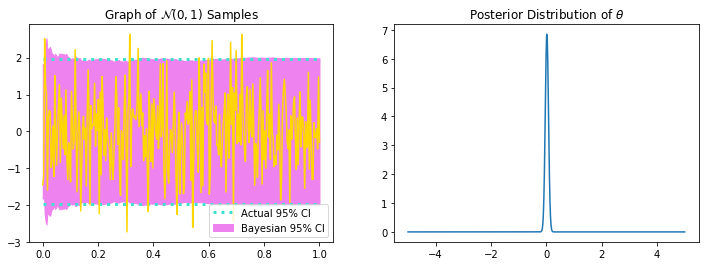

In [38]:
sigma_squared = 1 # this part is known
original_prior_mean, original_prior_variance = 0.3, 1 # lets guess that the mean is 0.3, prior variance we known is 1
size = 300 # size of the random sample

y = np.random.normal(size=size) # random standard normal sample
actual_95_CI = scipy.stats.norm.ppf(0.975) # critical value for 95% ci (we only need one due to symmetry)
t = np.linspace(0,1,len(y)) # I called this the input vector (vector of x coords)



posterior_mean = ((original_prior_mean/original_prior_variance)+(np.cumsum(y)/sigma_squared))/((1/original_prior_variance)+(np.arange(1,len(y)+1)/sigma_squared))
posterior_variance = 1/((1/original_prior_variance)+(np.arange(1,len(y)+1)/sigma_squared))

predictive_posterior_mean = posterior_mean
predictive_posterior_variance = sigma_squared + posterior_variance
bayesian_95_CI = scipy.stats.norm(loc=predictive_posterior_mean,scale=predictive_posterior_variance**(1/2)).ppf(0.975)




fig, ax = plt.subplots(1, 2,figsize=(12,4)) 
ax[0].plot([0,1],[-actual_95_CI,-actual_95_CI],color='turquoise',linestyle=':',linewidth=3,label='Actual 95% CI'); # actual lower CI
ax[0].plot([0,1],[actual_95_CI,actual_95_CI],color='turquoise',linestyle=':',linewidth=3); # actual upper CI
ax[0].plot(t,y,color='gold'); # plot sample
ax[0].fill_between(t,-bayesian_95_CI,bayesian_95_CI,color='violet',label='Bayesian 95% CI'); # bayesian CI
ax[0].set_title(r'Graph of $\mathcal{N}(0,1)$ Samples')
ax[0].legend()
ax[1].plot(np.linspace(-5,5,500),gaussian(np.linspace(-5,5,500),posterior_mean[-1],posterior_variance[-1]))
ax[1].set_title(r'Posterior Distribution of $\theta$')


print('Our best guess for the mean given the data (from a bayesian paradigm) is now',predictive_posterior_mean[-1])
print('Our best guess for the mean given the data (from a frequentist paradigm) is now',np.mean(y))
print('The actual mean is',0)